<a href="https://colab.research.google.com/github/AnsuyaMohapatra03-2000/Web_Sentiment_Analysis/blob/main/Web_Sentiment_Analysis_of_Reviews_and_Tweets_of_Kumbh_Mela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SENTIMENT ANALYSIS

1. KUMBH MELA REVIEWS (COMBINED REVIEWS FROM TRIP ADVISOR)

Importing of Libraries

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud

In [ ]:
def getPolarityList(givenReviews):
  polList = []
  for item in givenReviews:
    polList.append(TextBlob(item).sentiment[0])
  return polList
def getSubjectivityList(givenReviews):
  subList = []
  for item in givenReviews:
    subList.append(TextBlob(item).sentiment[1])
  return subList

POLARITY OF REVIEWS

Text(0, 0.5, 'Frequency')

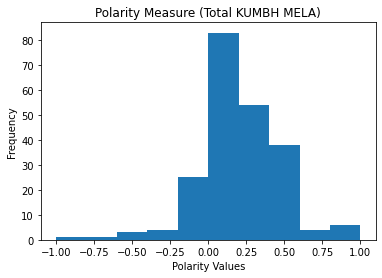

In [ ]:
Com_reviews = []
dataset = pd.read_excel('KumbhMelaTotalReviews.xls');
for i in range(0,len(dataset['REVIEW'])):
   Com_reviews.append(dataset['REVIEW'][i])

Com_polarity_measure = getPolarityList(Com_reviews)
plt.hist(Com_polarity_measure)
plt.title('Polarity Measure (Total KUMBH MELA)')
plt.xlabel('Polarity Values')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


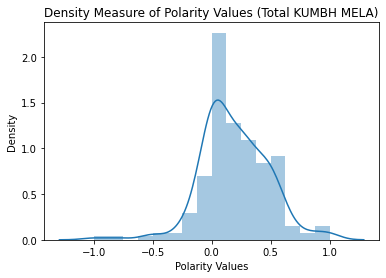

In [ ]:
Com_polarity_measure = getPolarityList(Com_reviews)
data = pd.DataFrame(Com_polarity_measure)
res = sn.distplot(data)
plt.title('Density Measure of Polarity Values (Total KUMBH MELA)')
plt.xlabel('Polarity Values')
plt.show()

Text(0, 0.5, 'Frequency')

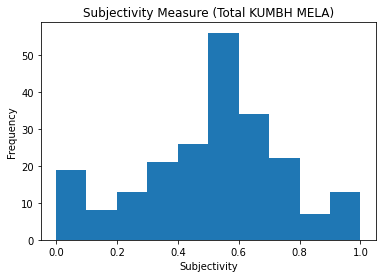

In [ ]:
Com_subjectivity_measure = getSubjectivityList(Com_reviews)
plt.hist(Com_subjectivity_measure)
plt.title('Subjectivity Measure (Total KUMBH MELA)')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


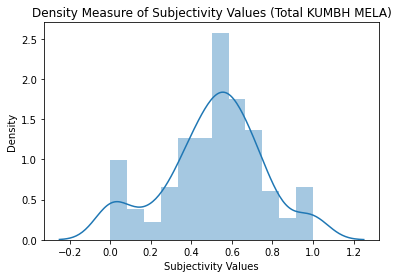

In [ ]:
Com_subjectivity_measure = getSubjectivityList(Com_reviews)

data = pd.DataFrame(Com_subjectivity_measure)
res = sn.distplot(data)
plt.title('Density Measure of Subjectivity Values (Total KUMBH MELA)')
plt.xlabel('Subjectivity Values')
plt.show()

Text(0, 0.5, 'Polarity')

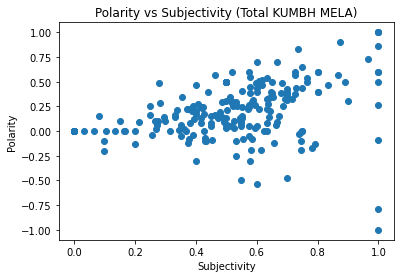

In [ ]:
plt.scatter(Com_subjectivity_measure,Com_polarity_measure)
plt.title('Polarity vs Subjectivity (Total KUMBH MELA)')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')

In [ ]:
pol_reviews = []
def getPolarity(Review):
  return TextBlob(Review).sentiment[0]
def getSubjectivity(Review):
  return TextBlob(Review).sentiment[1]
dataset = pd.read_excel('KumbhMelaTotalReviews.xls');
for i in range(0,len(dataset['REVIEW'])):
   pol_reviews.append((getPolarity(dataset['REVIEW'][i]),dataset['REVIEW'][i]))

positiveReviews = []
negativeReviews = []
neutralReviews = []
for i in range(0,len(pol_reviews)):
  if pol_reviews[i][0] > 0:
    positiveReviews.append(pol_reviews[i][1])
  elif pol_reviews[i][0] < 0:
    negativeReviews.append(pol_reviews[i][1])
  else:
    neutralReviews.append(pol_reviews[i][1])

In [ ]:
len(positiveReviews)

155

In [ ]:
len(negativeReviews)

34

In [ ]:
len(neutralReviews)

30

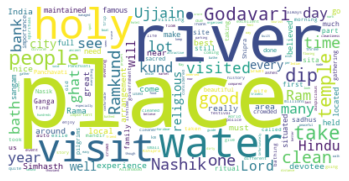

In [ ]:
#Positive Word cloud
%matplotlib inline
# df = pd.read_csv('tweets-for-two-keys-combined.csv')

text2 = " ".join(title for title in positiveReviews)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

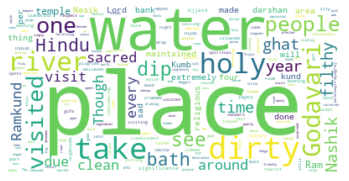

In [ ]:
#negative word cloud

%matplotlib inline

text2 = " ".join(title for title in negativeReviews)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

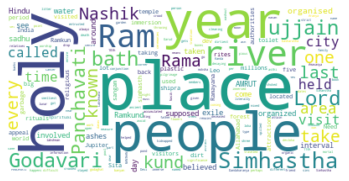

In [ ]:
#neutral word cloud

%matplotlib inline

text2 = " ".join(title for title in neutralReviews)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
import statistics
# count
count_polarity_reviews = len(Com_polarity_measure)
count_subjectivity_reviews = len(Com_subjectivity_measure)
#  mean
mean_polarity_reviews = statistics.mean(Com_polarity_measure)
mean_subjectivity_reviews = statistics.mean(Com_subjectivity_measure)
#  standard deviation
sd_polarity_reviews = statistics.stdev(Com_polarity_measure)
sd_subjectivity_reviews = statistics.stdev(Com_subjectivity_measure)
#  median
median_polarity_reviews = statistics.median(Com_polarity_measure)
median_subjectivity_reviews = statistics.median(Com_subjectivity_measure)
# min
min_pol = min(Com_polarity_measure)
min_sub = min(Com_subjectivity_measure)
# max
max_pol = max(Com_polarity_measure)
max_sub = max(Com_subjectivity_measure)

from prettytable import PrettyTable
columns = ['','Polarity','Subjectivity']
myTable = PrettyTable()

myTable.add_column(columns[0],['Count','Mean','Standard Deviation','Min','Median','Max'])
myTable.add_column(columns[1],[count_polarity_reviews,mean_polarity_reviews,sd_polarity_reviews,min_pol,median_polarity_reviews,max_pol])
myTable.add_column(columns[2],[count_subjectivity_reviews,mean_subjectivity_reviews,sd_subjectivity_reviews,min_sub,median_subjectivity_reviews,max_sub])

print(myTable)

+--------------------+--------------------+--------------------+
|                    |      Polarity      |    Subjectivity    |
+--------------------+--------------------+--------------------+
|       Count        |        219         |        219         |
|        Mean        | 0.1941602660992338 | 0.5092038789922841 |
| Standard Deviation | 0.2845947241416341 | 0.244831241426112  |
|        Min         |        -1.0        |        0.0         |
|       Median       |       0.1625       | 0.5314814814814816 |
|        Max         |        1.0         |        1.0         |
+--------------------+--------------------+--------------------+


2. TWEETS

Text(0, 0.5, 'Frequency')

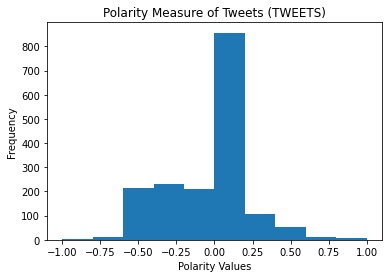

In [ ]:
#polarity
tweetsExtracted = []
dataset = pd.read_csv('tweets-for-two-keys-combined.csv');
for i in range(0,len(dataset['TWEET'])):
   tweetsExtracted.append(dataset['TWEET'][i])

Tw_polarity_measure = getPolarityList(tweetsExtracted)
plt.hist(Tw_polarity_measure)
plt.title('Polarity Measure of Tweets (TWEETS)')
plt.xlabel('Polarity Values')
plt.ylabel('Frequency')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


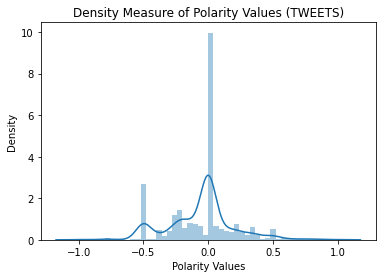

In [ ]:
Tw_polarity_measure = getPolarityList(tweetsExtracted)
data = pd.DataFrame(Tw_polarity_measure )
res = sn.distplot(data)
plt.title('Density Measure of Polarity Values (TWEETS)')
plt.xlabel('Polarity Values')
plt.show()

Text(0, 0.5, 'Frequency')

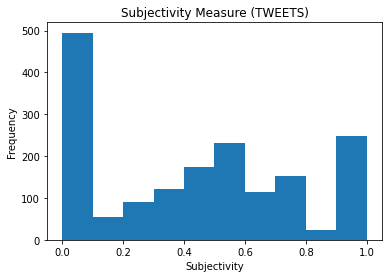

In [ ]:
Tw_subjectivity_measure = getSubjectivityList(tweetsExtracted)
plt.hist(Tw_subjectivity_measure)
plt.title('Subjectivity Measure (TWEETS)')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


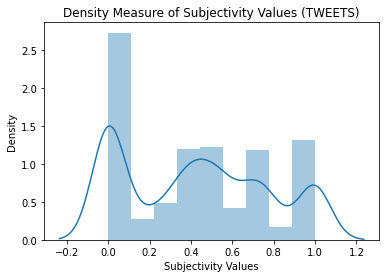

In [ ]:
Tw_subjectivity_measure = getSubjectivityList(tweetsExtracted)
data = pd.DataFrame(Tw_subjectivity_measure)
res = sn.distplot(data)
plt.title('Density Measure of Subjectivity Values (TWEETS)')
plt.xlabel('Subjectivity Values')
plt.show()

Text(0, 0.5, 'Polarity')

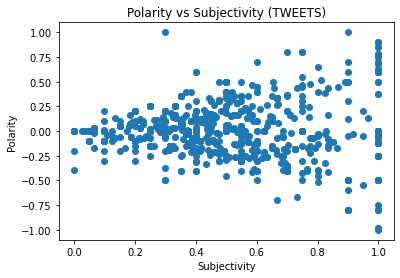

In [ ]:
plt.scatter(Tw_subjectivity_measure,Tw_polarity_measure)
plt.title('Polarity vs Subjectivity (TWEETS)')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')

In [ ]:
pol_tweets = []
def getPolarity(Review):
  return TextBlob(Review).sentiment[0]
def getSubjectivity(Review):
  return TextBlob(Review).sentiment[1]
dataset = pd.read_csv('tweets-for-two-keys-combined.csv');
for i in range(0,len(dataset['TWEET'])):
   pol_tweets.append((getPolarity(dataset['TWEET'][i]),dataset['TWEET'][i]))

positiveTweets = []
negativeTweets = []
neutralTweets = []
for i in range(0,len(pol_tweets)):
  if pol_tweets[i][0] > 0:
    positiveTweets.append(pol_tweets[i][1])
  elif pol_tweets[i][0] < 0:
    negativeTweets.append(pol_tweets[i][1])
  else:
    neutralTweets.append(pol_tweets[i][1])

In [ ]:
len(positiveTweets)

380

In [ ]:
len(negativeTweets)

667

In [ ]:
len(neutralTweets)

658

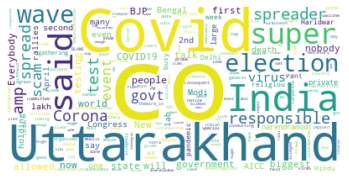

In [ ]:
#Positive Word cloud
%matplotlib inline
# df = pd.read_csv('tweets-for-two-keys-combined.csv')

text2 = " ".join(title for title in positiveTweets)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

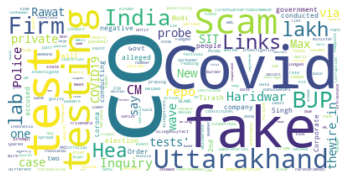

In [ ]:
#negative word cloud

%matplotlib inline

text2 = " ".join(title for title in negativeTweets)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

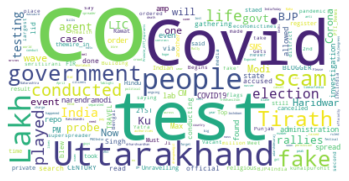

In [ ]:
#neutral word cloud

%matplotlib inline

text2 = " ".join(title for title in neutralTweets)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
import statistics
# count
count_polarity_reviews = len(Tw_polarity_measure)
count_subjectivity_reviews = len(Tw_subjectivity_measure)
#  mean
mean_polarity_reviews = statistics.mean(Tw_polarity_measure)
mean_subjectivity_reviews = statistics.mean(Tw_subjectivity_measure)
#  standard deviation
sd_polarity_reviews = statistics.stdev(Tw_polarity_measure)
sd_subjectivity_reviews = statistics.stdev(Tw_subjectivity_measure)
#  median
median_polarity_reviews = statistics.median(Tw_polarity_measure)
median_subjectivity_reviews = statistics.median(Tw_subjectivity_measure)
# min
min_pol = min(Tw_polarity_measure)
min_sub = min(Tw_subjectivity_measure)
# max
max_pol = max(Tw_polarity_measure)
max_sub = max(Tw_subjectivity_measure)

from prettytable import PrettyTable
columns = ['','Polarity','Subjectivity']
myTable = PrettyTable()

myTable.add_column(columns[0],['Count','Mean','Standard Deviation','Min','Median','Max'])
myTable.add_column(columns[1],[count_polarity_reviews,mean_polarity_reviews,sd_polarity_reviews,min_pol,median_polarity_reviews,max_pol])
myTable.add_column(columns[2],[count_subjectivity_reviews,mean_subjectivity_reviews,sd_subjectivity_reviews,min_sub,median_subjectivity_reviews,max_sub])

print(myTable)

+--------------------+----------------------+---------------------+
|                    |       Polarity       |     Subjectivity    |
+--------------------+----------------------+---------------------+
|       Count        |         1705         |         1705        |
|        Mean        | -0.05623730942471778 | 0.42752183015746065 |
| Standard Deviation | 0.25703668651065187  | 0.34790794408606057 |
|        Min         |         -1.0         |         0.0         |
|       Median       |         0.0          |         0.4         |
|        Max         |         1.0          |         1.0         |
+--------------------+----------------------+---------------------+


3. HEADLINES

In [ ]:
dataset = pd.read_csv('news-headlines-combined.csv')
headlines = []
for i in range(0,len(dataset['TOPIC'])):
   headlines.append(dataset['TOPIC'][i])

In [ ]:
headlinesPolarity_measure = getPolarityList(headlines)
headlinesSubjectivity_measure = getSubjectivityList(headlines)

Text(0, 0.5, 'Frequency')

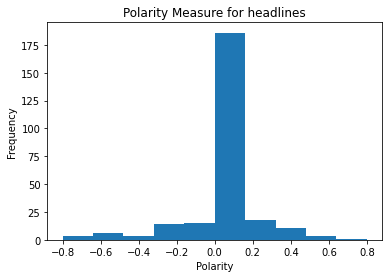

In [ ]:
# HISTOGRAM BAR GRAPH FOR THE POLARITY OF THE HEADLINES EXTRACTED
plt.hist(headlinesPolarity_measure)
plt.title('Polarity Measure for headlines')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


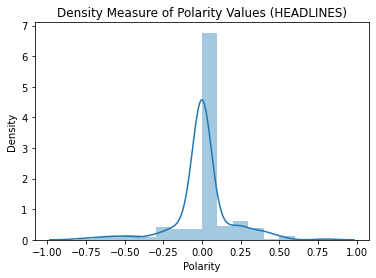

In [ ]:
data = pd.DataFrame(headlinesPolarity_measure)
res = sn.distplot(data)
plt.title('Density Measure of Polarity Values (HEADLINES)')
plt.xlabel('Polarity')
plt.show()

Text(0, 0.5, 'Frequency')

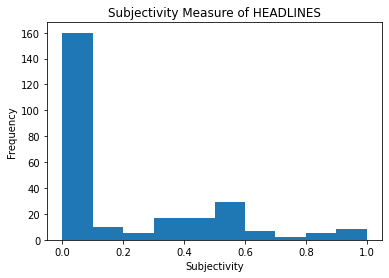

In [ ]:
plt.hist(headlinesSubjectivity_measure)
plt.title('Subjectivity Measure of HEADLINES')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


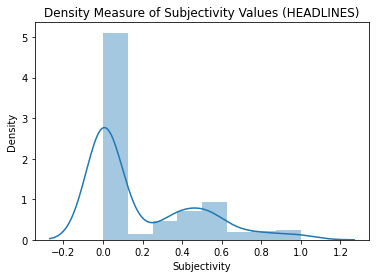

In [ ]:
data = pd.DataFrame(headlinesSubjectivity_measure)
res = sn.distplot(data)
plt.title('Density Measure of Subjectivity Values (HEADLINES)')
plt.xlabel('Subjectivity')
plt.show()

Text(0, 0.5, 'Polarity')

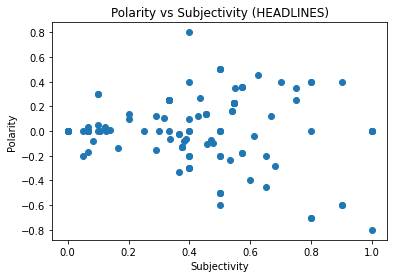

In [ ]:
plt.scatter(headlinesSubjectivity_measure,headlinesPolarity_measure)
plt.title('Polarity vs Subjectivity (HEADLINES)')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')

In [ ]:
pol_headlines = []
def getPolarity(Review):
  return TextBlob(Review).sentiment[0]
def getSubjectivity(Review):
  return TextBlob(Review).sentiment[1]
dataset = pd.read_csv('news-headlines-combined.csv');
for i in range(0,len(dataset['TOPIC'])):
   pol_headlines.append((getPolarity(dataset['TOPIC'][i]),dataset['TOPIC'][i]))

positiveHeadlines = []
negativeHeadlines = []
neutralHeadlines = []
for i in range(0,len(pol_headlines)):
  if pol_headlines[i][0] > 0:
    positiveHeadlines.append(pol_headlines[i][1])
  elif pol_headlines[i][0] < 0:
    negativeHeadlines.append(pol_headlines[i][1])
  else:
    neutralHeadlines.append(pol_headlines[i][1])

In [ ]:
len(positiveHeadlines)

47

In [ ]:
len(negativeHeadlines)

41

In [ ]:
len(neutralHeadlines)

172

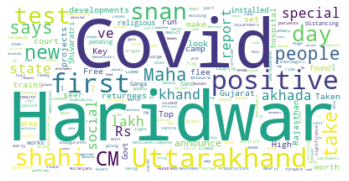

In [ ]:
#Positive Word cloud
%matplotlib inline
# df = pd.read_csv('news-headlines-combined.csv')

text2 = " ".join(title for title in positiveHeadlines)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

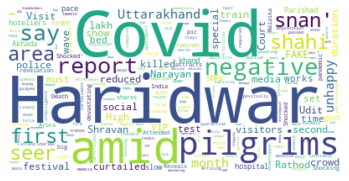

In [ ]:
#negative word cloud

%matplotlib inline

text2 = " ".join(title for title in negativeHeadlines)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

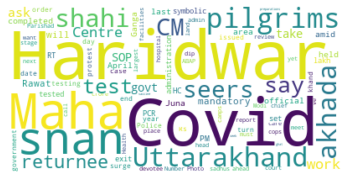

In [ ]:
#neutral word cloud

%matplotlib inline

text2 = " ".join(title for title in neutralHeadlines)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")

plt.show()

In [ ]:
import statistics

# count
count_polarity_reviews = len(headlinesPolarity_measure)
count_subjectivity_reviews = len(headlinesSubjectivity_measure)
#  mean
mean_polarity_reviews = statistics.mean(headlinesPolarity_measure)
mean_subjectivity_reviews = statistics.mean(headlinesSubjectivity_measure)
#  standard deviation
sd_polarity_reviews = statistics.stdev(headlinesPolarity_measure)
sd_subjectivity_reviews = statistics.stdev(headlinesSubjectivity_measure)
#  median
median_polarity_reviews = statistics.median(headlinesPolarity_measure)
median_subjectivity_reviews = statistics.median(headlinesSubjectivity_measure)
# min
min_pol = min(headlinesPolarity_measure)
min_sub = min(headlinesSubjectivity_measure)
# max
max_pol = max(headlinesPolarity_measure)
max_sub = max(headlinesSubjectivity_measure)

from prettytable import PrettyTable
columns = ['','Polarity','Subjectivity']
myTable = PrettyTable()

myTable.add_column(columns[0],['Count','Mean','Standard Deviation','Min','Median','Max'])
myTable.add_column(columns[1],[count_polarity_reviews,mean_polarity_reviews,sd_polarity_reviews,min_pol,median_polarity_reviews,max_pol])
myTable.add_column(columns[2],[count_subjectivity_reviews,mean_subjectivity_reviews,sd_subjectivity_reviews,min_sub,median_subjectivity_reviews,max_sub])

print(myTable)

+--------------------+----------------------+---------------------+
|                    |       Polarity       |     Subjectivity    |
+--------------------+----------------------+---------------------+
|       Count        |         260          |         260         |
|        Mean        | 0.003898240648240649 | 0.19155477855477857 |
| Standard Deviation |  0.1865160614107671  | 0.27293295335762946 |
|        Min         |         -0.8         |         0.0         |
|       Median       |         0.0          |         0.0         |
|        Max         |         0.8          |         1.0         |
+--------------------+----------------------+---------------------+


Frequently used words:

In [ ]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file = open('news.txt', encoding="utf8")
a= file.read()

In [ ]:
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['a','the','  ', 'is','there','to']))s

In [ ]:
wordcount_A = {}

In [ ]:
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount_A:
            wordcount_A[word] = 1
        else:
            wordcount_A[word] += 1

In [ ]:
n_print = int(input("How many most common words to print: "))
print("\n The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount_A)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 30

 The 30 most common words are as follows

haridwar :  116
covid :  70
uttarakhand :  56
 :  48
maha :  44
pilgrims :  42
cm :  36
snan :  34
2021 :  34
test :  34
covid-19 :  34
shahi :  32
seers :  32
akhada :  28
2019 :  26
amid :  22
returnees :  22
lakh :  20
report :  20
govt :  18
u???khand :  18
positive :  16
rs :  16
mandatory :  16
ganga :  16
1 :  16
set :  16
centre :  16
days :  14
court :  14


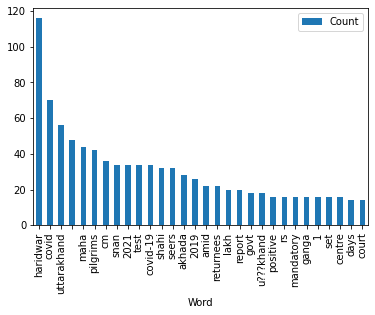

In [ ]:
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [ ]:
file.close()

twitter

In [ ]:
file = open('twitter.txt', encoding="utf8")
a= file.read()

In [ ]:
stopwords = set(line.strip() for line in open('stopwords.txt'))

In [ ]:
wordcount_A = {}

In [ ]:
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    word = word.replace("  ","")
    if word not in stopwords:
        if word not in wordcount_A:
            wordcount_A[word] = 1
        else:
            wordcount_A[word] += 1

In [ ]:
n_print = int(input("How many most common words to print: "))
print("\n The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount_A)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

How many most common words to print: 30

 The 30 most common words are as follows

 :  918
covid :  906
fake :  824
tests :  660
# :  524
uttarakhand :  494
scam :  438
testing :  412
lakh :  364
1 :  292
bjp :  266
people :  264
government :  258
test :  240
covid-19 :  212
tirath :  208
conducted :  208
india :  204
firm :  194
wave :  184
cm :  170
links :  160
probe :  160
haridwar :  154
election :  154
played :  152
govt :  150
labs :  150
life :  146
private :  142


In [ ]:
file.close()

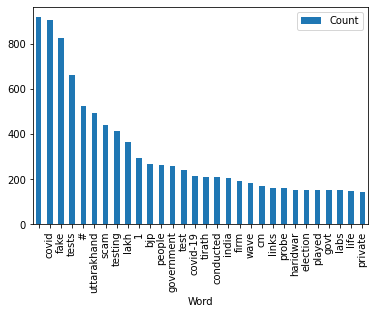

In [ ]:
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')